**Examples**


Sweeping Parameters

In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.9 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')
from modsim import *

Downloaded modsim.py


In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

Downloaded chap11.py


In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap12.py')

Downloaded chap12.py


In [5]:
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results
from chap12 import calc_total_infected

Sweeping Beta

In [6]:
beta_array = linspace(0.1, 1.1, 11)
gamma = 0.25
def sweep_beta(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = calc_total_infected(results, system)
    return sweep
infected_sweep = sweep_beta(beta_array, gamma)
label = f'gamma = {gamma}'
label

'gamma = 0.25'

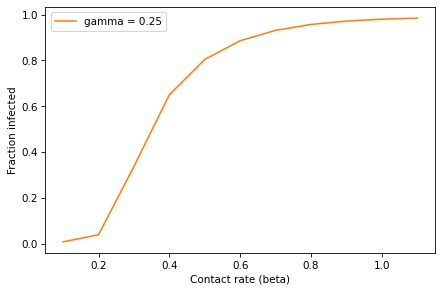

In [7]:
infected_sweep.plot(label=label, color='C1')
decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

Sweeping Gamma

In [8]:
gamma_array = linspace(0.1, 0.7, 4)
gamma_array

array([0.1, 0.3, 0.5, 0.7])

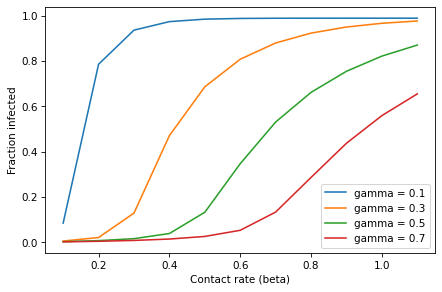

In [9]:
for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    label = f'gamma = {gamma}'
    infected_sweep.plot(label=label)
decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

Using a SweepFrame

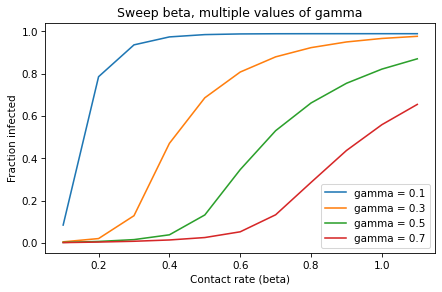

In [11]:
def sweep_parameters(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame
frame = sweep_parameters(beta_array, gamma_array)
for gamma in gamma_array:
    label = f'gamma = {gamma}'
    frame[gamma].plot(label=label)
decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected',
         title='Sweep beta, multiple values of gamma')

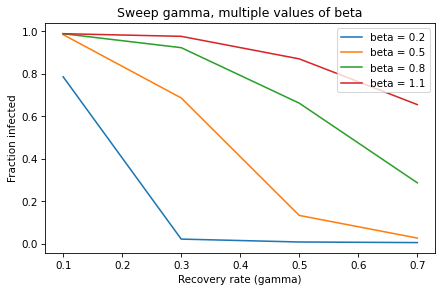

In [12]:
for beta in [0.2, 0.5, 0.8, 1.1]:
    label = f'beta = {beta}'
    frame.loc[beta].plot(label=label)
decorate(xlabel='Recovery rate (gamma)',
         ylabel='Fraction infected',
         title='Sweep gamma, multiple values of beta')

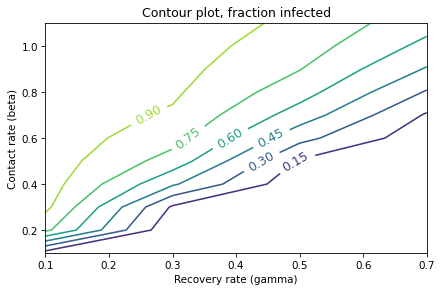

In [13]:
contour(frame)
decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, fraction infected')

**Exercises**

Exercise 1

In [14]:
gamma = 1/2
infected_sweep = sweep_beta(beta_array, gamma)
infected_sweep

Parameter
0.1    0.002736
0.2    0.007235
0.3    0.015929
0.4    0.038603
0.5    0.132438
0.6    0.346765
0.7    0.530585
0.8    0.661553
0.9    0.754595
1.0    0.821534
1.1    0.870219
Name: Metric, dtype: float64

In [15]:
beta_estimate = crossings(infected_sweep, 0.4)
beta_estimate

array([0.62548698])

In [16]:
time_between_contacts = 1/beta_estimate
time_between_contacts

array([1.59875429])